# EDA IS ALL YOU NEED

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

def load_dataset(plant):
    train = pd.read_csv(f'../data/train_{plant}.csv', parse_dates=["时间"]).drop_duplicates().reset_index(drop=True)
    test = pd.read_csv(f'../data/test_{plant}.csv', parse_dates=["时间"])
    train.columns = ['time', 'irr', 'ws', 'wd', 'temp', 'pr', 'hm', 'mirr', 'power']
    test.columns = ['id', 'time', 'irr', 'ws', 'wd', 'temp', 'pr', 'hm']
    data = pd.concat([train, test])
    return data

PLANT = 1
pl = load_dataset(1)
train = pl.id.isnull()
test  = pl.id.notnull()

print(f'train set from {pl[train]["time"].min().date()} to {pl[train]["time"].max().date()}')
print(f'test  set from {pl[test]["time"].min().date()} to {pl[test]["time"].max().date()}')
M5toM8 = pl.time.dt.month.isin([5, 6, 7, 8])

## Power

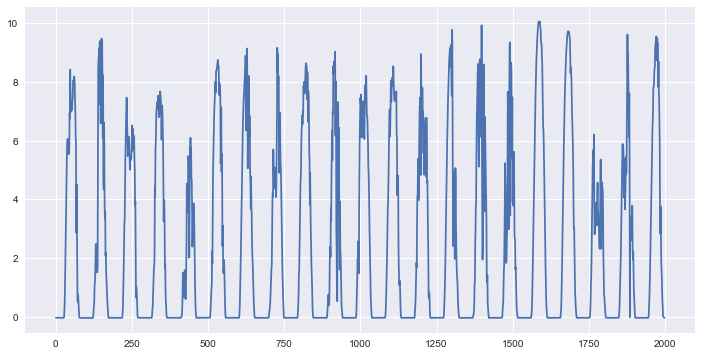

In [47]:
pl.iloc[: 2000]['power'].plot(figsize=(12, 6))

In [49]:
max_power_time = pl.groupby(pl.time.dt.date).apply(lambda x: np.argmax(x.power)).dropna()

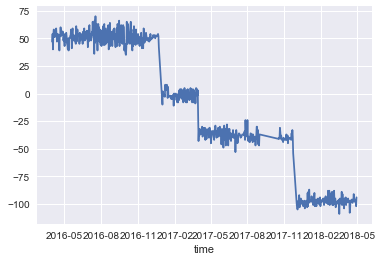

In [55]:
(max_power_time - np.array(range(698)) * 96).plot()

## Date Feature

In [36]:
pl

,hm,id,irr,mirr,power,pr,temp,time,wd,ws
0,-0.157895,NaN,-1.000000,0.00000,-0.019333,-0.030303,-0.090909,2016-04-01 00:15:00.000,251,-0.707547
1,-0.136842,NaN,-1.000000,0.00000,-0.021000,-0.030303,-0.107071,2016-04-01 00:30:00.000,250,-0.716981
2,-0.094737,NaN,-1.000000,0.00000,-0.022000,0.030303,-0.123232,2016-04-01 00:45:00.000,248,-0.726415
3,-0.073684,NaN,-1.000000,0.00000,-0.022000,0.030303,-0.135354,2016-04-01 01:00:00.000,244,-0.735849
4,-0.052632,NaN,-1.000000,0.00000,-0.022000,0.030303,-0.147475,2016-04-01 01:15:00.000,241,-0.754717
5,-0.010526,NaN,-1.000000,0.00000,-0.020667,0.030303,-0.163636,2016-04-01 01:30:00.000,234,-0.754717
6,0.010526,NaN,-1.000000,0.00000,-0.020667,0.030303,-0.179798,2016-04-01 01:45:00.000,231,-0.754717
7,0.031579,NaN,-1.000000,0.00000,-0.020667,0.030303,-0.191919,2016-04-01 02:00:00.000,227,-0.764151
8,0.073684,NaN,-1.000000,0.00000,-0.022000,0.030303,-0.204040,2016-04-01 02:15:00.000,220,-0.764151
9,0.094737,NaN,-1.000000,0.00000,-0.022000,0.030303,-0.216162,2016-04-01 02:30:00.000,215,-0.773585


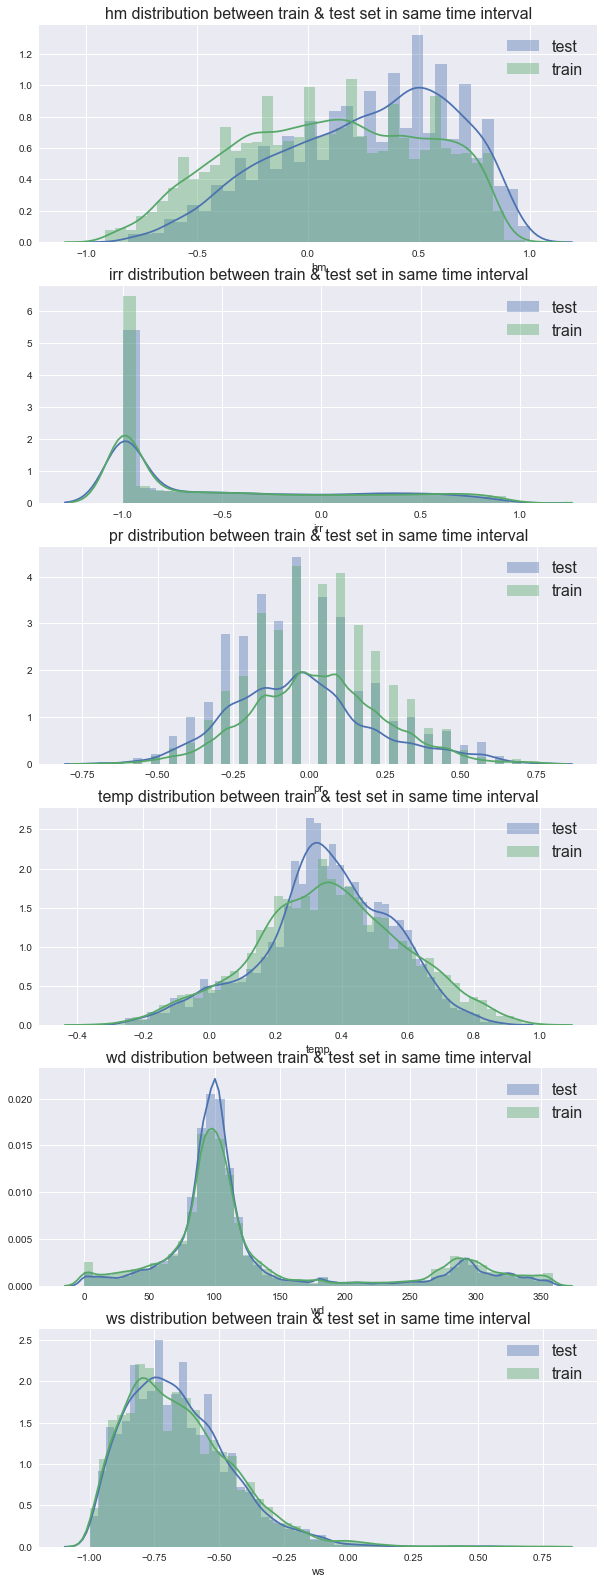

In [34]:
look_col = ['hm', 'irr', 'pr', 'temp', 'wd', 'ws']
f, axes = plt.subplots(len(look_col), figsize=(10, 28))
for i, col in enumerate(look_col):
    sns.distplot(pl[test & M5toM8][col], ax=axes[i], label="test")
    sns.distplot(pl[train & M5toM8][col], ax=axes[i], label="train")
    axes[i].legend(fontsize=16)
    axes[i].set_title(f'{col} distribution between train & test set in same time interval', size=16)